<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week- 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df_fish = pd.read_csv('Fish.csv')
df_fish.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
# Separating Numerical and Categorical Features
df_num = df_fish.select_dtypes(include = np.number)
df_cat = df_fish.select_dtypes(exclude = np.number)

In [115]:
# Checking the Numerical Features
df_num.head(2)

,Weight,V_length,D_length,C_length,Height,Width
0,242.0,23.2,25.4,30.0,11.52,4.0200
1,290.0,24.0,26.3,31.2,12.48,4.3056


In [116]:
#Checking categorical Featuers
df_cat.head(2)

,Species
0,Bream
1,Bream


In [117]:
# Encoding the Cat Features
encoded_cat = pd.get_dummies(df_cat,drop_first=True)

X = pd.concat([df_num,encoded_cat],axis=1).drop('Weight',axis=1)

Y = df_fish['Weight']

In [118]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(127, 11)
(127,)
(32, 11)
(32,)


In [119]:
# Scaling the Training and Test Data

X_Scaler = StandardScaler()

x_train = X_Scaler.fit_transform(x_train)
x_test = X_Scaler.transform(x_test)

y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

In [120]:
x_train

array([[ 1.21658233,  1.2220719 ,  1.07954096, ..., -0.36596253,
        -0.30794088, -0.18033393],
       [-0.48180958, -0.5235848 , -0.4480316 , ...,  2.7325202 ,
        -0.30794088, -0.18033393],
       [-0.69172318, -0.69280663, -0.66271748, ..., -0.36596253,
        -0.30794088, -0.18033393],
       ...,
       [ 0.22426346,  0.24236661,  0.41896904, ..., -0.36596253,
        -0.30794088, -0.18033393],
       [ 1.24520691,  1.2220719 ,  1.1043124 , ..., -0.36596253,
        -0.30794088, -0.18033393],
       [ 0.13838971,  0.12658325,  0.33639755, ..., -0.36596253,
        -0.30794088, -0.18033393]])

In [121]:
linreg = LinearRegression()

linear_model = linreg.fit(x_train,y_train)

train_pred = linear_model.predict(x_train)
test_pred = linear_model.predict(x_test)

# Mean Squared Error of training set
mse_train = mean_squared_error(y_train,train_pred)

rmse_train = np.sqrt(mse_train)

print('RMSE train : ',rmse_train.round(2))

# MSE and RMSE on test data

mse_test = mean_squared_error(y_test,test_pred)

rmse_test = np.sqrt(mse_test)

print('RMSE Test :',rmse_test.round(2))

# model Overfitted as the train RMSE and test RMSE has huge error difference

RMSE train :  0.25
RMSE Test : 0.64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
encoded_cat = pd.get_dummies(df_cat,drop_first=True)

X = pd.concat([df_num,encoded_cat],axis=1).drop('Weight',axis=1)

X= sm.add_constant(X)

Y = df_fish['Weight']

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(127, 12)
(127,)
(32, 12)
(32,)


In [102]:
# Scaling the Training and Test Data

X_Scaler = StandardScaler()

x_train = X_Scaler.fit_transform(x_train)
x_test = X_Scaler.transform(x_test)

y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

In [103]:
ols_model = sm.OLS(y_train,x_train).fit()

print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              159.0
Date:                Tue, 01 Mar 2022   Prob (F-statistic):                    1.66e-64
Time:                        16:12:51   Log-Likelihood:                         -3.3321
No. Observations:                 127   AIC:                                      28.66
Df Residuals:                     116   BIC:                                      59.95
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
print('The Condition number is {0} which is very high . Hence we can confirm that the dataset has high MultiCollinearity'.format(np.format_float_positional(2.15e+03)))

The Condition number is 2150. which is very high . Hence we can confirm that the dataset has high MultiCollinearity


In [104]:
train_pred = ols_model.predict(x_train)
test_pred = ols_model.predict(x_test)



# Mean Squared Error of training set
mse_train = mean_squared_error(y_train,train_pred)

rmse_train = np.sqrt(mse_train)

print('RMSE train : ',rmse_train.round(2))

# MSE and RMSE on test data

mse_test = mean_squared_error(y_test,test_pred)

rmse_test = np.sqrt(mse_test)

print('RMSE test :',rmse_test.round(2))

RMSE train :  0.25
RMSE test : 0.64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
X = pd.concat([df_num,encoded_cat],axis=1).drop('Weight',axis=1)


Y = df_fish['Weight']

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(127, 11)
(127,)
(32, 11)
(32,)


In [84]:
# Scaling the Training and Test Data

X_Scaler = StandardScaler()

x_train = X_Scaler.fit_transform(x_train)
x_test = X_Scaler.transform(x_test)

y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

In [87]:
ridge = Ridge(alpha = 1.5)

ridge_model = ridge.fit(x_train,y_train)

train_pred = ridge_model.predict(x_train)
test_pred = ridge_model.predict(x_test)



# Mean Squared Error of training set
mse_train = mean_squared_error(y_train,train_pred)

rmse_train = np.sqrt(mse_train)

print('RMSE train : ',rmse_train.round(2))

# MSE and RMSE on test data

mse_test = mean_squared_error(y_test,test_pred)

rmse_test = np.sqrt(mse_test)

print('RMSE test :',rmse_test.round(2))

RMSE train :  0.26
RMSE test : 0.62


In [105]:

# There is 0.02 differnce in the RMSE of OLS and Ridge

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [129]:
x_train.shape

(127, 11)

In [128]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

# Scaling the Training and Test Data

X_Scaler = StandardScaler()

x_train = X_Scaler.fit_transform(x_train)
x_test = X_Scaler.transform(x_test)

y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

In [130]:
sgd = SGDRegressor(random_state = 1)

sgd_model = sgd.fit(x_train,y_train)

In [131]:
df_train = pd.concat([df_num,encoded_cat],axis=1).drop('Weight',axis=1)

df_train.shape

(159, 11)

In [132]:
linear_model.coef_

array([-2.3209448 ,  2.0989425 ,  1.44994864,  0.14279164, -0.09060389,
        0.13513386,  0.29922109, -0.10819895,  0.1275215 ,  0.38970945,
        0.07967051])

In [133]:
sgd_model.coef_

array([ 0.2389999 ,  0.23742774,  0.22565242,  0.14506113,  0.2318666 ,
        0.0034164 ,  0.01620184, -0.04867946, -0.04323349,  0.1651713 ,
        0.01131562])

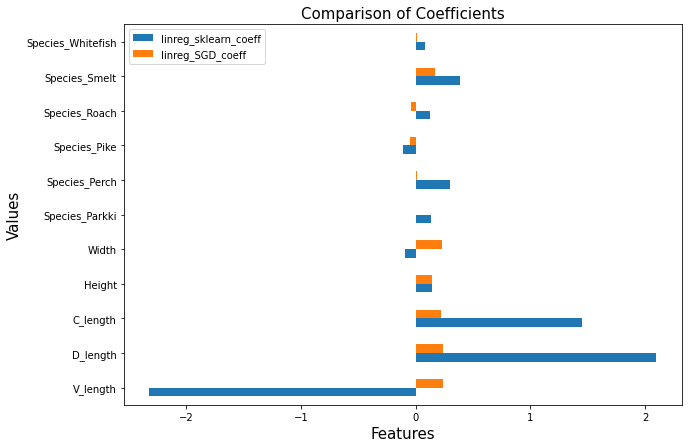

In [134]:
df_coeff = pd.DataFrame([linear_model.coef_, sgd_model.coef_], columns = df_train.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])

# plot a side by side bar graph
# 'T' returns the transposed dataframe 
# set figure size using 'figsize'
fig = df_coeff.T.plot.barh( figsize=(10,7))

# set axes and plot labels
# set the text size using 'fontsize'
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)

# set the x-axis labels horizontally
plt.xticks(rotation = 'horizontal')

# set the position of legend
fig.legend(loc='upper left')

# display the plot
plt.show()

 We can observe that the coefficients obtained from the SGD model have smaller values as compared to the values obtained from the linear regression model using sklearn. Thus, we can say that the SGD model predicts the fish weighr with higher accuracy than the linear regression model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

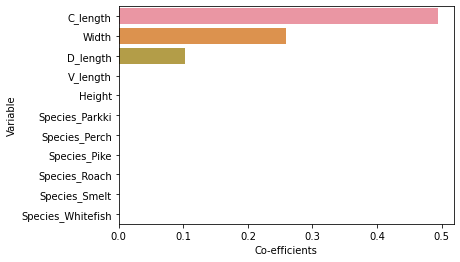

In [146]:
lasso = Lasso(alpha=0.1)

lasso_model = lasso.fit(x_train,y_train)

df_lasso = pd.DataFrame({'Variable': df_train.columns,'Co-efficients' : lasso_model.coef_})

sorted_df = df_lasso.sort_values('Co-efficients',ascending=False)

sns.barplot(data = sorted_df,y='Variable',x='Co-efficients')

plt.show()

In [147]:
# Except C_length,Width,D_length all others are least significant

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
df_fish.columns

Index(['Species', 'Weight', 'V_length', 'D_length', 'C_length', 'Height',
       'Width'],
      dtype='object')

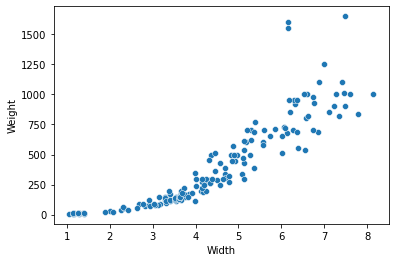

In [140]:
sns.scatterplot(data = df_fish,x='Width',y='Weight')
plt.show()

In [141]:
df_fish['Width'].corr(df_fish['Weight'])

0.8869600089994604

In [142]:
# The Impact is Highly Corelated . If Width Increases , Weight of The Fish Also increases and vice versa

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [152]:
alpha = [0.00001, 0.001, 0.1, 10, 100]
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge_model = ridge.fit(x_train,y_train)
    test_pred = ridge_model.predict(x_test)
    mse = mean_squared_error(y_test,test_pred)
    print('alpha : {0} , rmse : {1}'.format(i,np.sqrt(mse)))

alpha : 1e-05 , rmse : 0.6421304313165805
alpha : 0.001 , rmse : 0.6415220948360464
alpha : 0.1 , rmse : 0.6294845058964403
alpha : 10 , rmse : 0.5975050549067472
alpha : 100 , rmse : 0.5906244021182478


In [155]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[0.00001, 0.001, 0.1, 10, 100]}]
 
# instantiate the Lasso() method
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression:', ridge_grid.best_params_)

Best parameters for Lasso Regression: {'alpha': 0.1}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [161]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = [{'l1_ratio':[0.0001, 0.001, 0.01, 0.1, 1]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet(alpha=0.1)

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'l1_ratio': 0.0001} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [148]:
# 'alpha' assigns the regularization strength to the model
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.1, 1, 2, 3]}]
 
# instantiate the Lasso() method
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression:', lasso_grid.best_params_)

Best parameters for Lasso Regression: {'alpha': 0.001}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.0001)

enet_model = enet.fit(x_train, y_train)



train_pred = enet_model.predict(x_train)
test_pred = enet_model.predict(x_test)

# Mean Squared Error of training set
mse_train = mean_squared_error(y_train,train_pred)

rmse_train = np.sqrt(mse_train)

print('RMSE train : ',rmse_train.round(2))

# MSE and RMSE on test data

mse_test = mean_squared_error(y_test,test_pred)

rmse_test = np.sqrt(mse_test)

print('RMSE Test :',rmse_test.round(2))

RMSE train :  0.27
RMSE Test : 0.59
